# Project 2: RiyadhVillasAqar


In [1]:
# pip install --upgrade arabic-reshaper

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ast 
from collections import Counter
from wordcloud import WordCloud
import plotly.graph_objects as go 
import arabic_reshaper
#from bidi.algorithm import get_display

## EDA
- Apply the essential EDA steps: head, shape, info, describe, and missing values.
- Apply the additional EDA steps based on your dataset needs.

In [3]:
DF = pd.read_csv('RiyadhVillasAqar.csv')
DF

/var/folders/tb/fw_49hkd2vl1gfskxm71_9xh0000gn/T/ipykernel_12801/2915625437.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  DF = pd.read_csv('RiyadhVillasAqar.csv')


,Unnamed: 0,front,rooms,lounges,bathrooms,streetWidth,stairs,propertyAge,driverRoom,tent,...,apartments,maidRoom,elevator,furnihsed,pool,basement,neighbourhood,location,price,square price
0,0,شرقية,5,4.0,5+,20.0,1.0,0.0,1.0,1.0,...,0,0.0,0.0,0.0,0.0,0.0,عكاظ,جنوب الرياض,1050000.0,3500.000000
1,1,غربية,4,3.0,5+,20.0,1.0,0.0,1.0,1.0,...,2.0,1.0,1.0,0.0,0.0,0.0,المهدية,غرب الرياض,3000000.0,5555.555556
2,2,جنوبية شرقية,7,2.0,5+,15.0,1.0,31.0,1.0,0.0,...,0,1.0,0.0,0.0,0.0,0.0,الشفا,جنوب الرياض,2000000.0,2285.714286
3,3,غربية,7,3.0,5+,15.0,1.0,3.0,0.0,1.0,...,0,1.0,0.0,1.0,0.0,0.0,ظهرة لبن,غرب الرياض,894000.0,4470.000000
4,4,شمالية,4,2.0,4,25.0,1.0,0.0,1.0,1.0,...,3.0,1.0,1.0,1.0,0.0,0.0,قرطبة,شرق الرياض,3500000.0,8750.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46821,51840,جنوبية,5,2,5+,20.0,1.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,المونسية,شرق الرياض,2250000.0,5844.155844
46822,51841,غربية,7,2,5+,12.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,ظهرة البديعة,غرب الرياض,1050000.0,2100.000000
46823,51842,غربية,5,3,5+,20.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,طويق,غرب الرياض,1000000.0,5000.000000
46824,51843,جنوبية غربية,1,NaN,1,15.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,النهضة,شرق الرياض,2300000.0,5679.012346


In [4]:
DF.shape

(46826, 26)

In [5]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46826 entries, 0 to 46825
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     46826 non-null  int64  
 1   front          46826 non-null  object 
 2   rooms          46826 non-null  int64  
 3   lounges        45708 non-null  object 
 4   bathrooms      46826 non-null  object 
 5   streetWidth    46636 non-null  float64
 6   stairs         46826 non-null  float64
 7   propertyAge    46826 non-null  float64
 8   driverRoom     46826 non-null  float64
 9   tent           46826 non-null  float64
 10  patio          46826 non-null  float64
 11  kitchen        46826 non-null  float64
 12  outdoorRoom    46826 non-null  float64
 13  garage         46826 non-null  float64
 14  duplex         46826 non-null  float64
 15  space          46826 non-null  int64  
 16  apartments     46826 non-null  object 
 17  maidRoom       46826 non-null  float64
 18  elevat

In [6]:
DF.describe()

,Unnamed: 0,rooms,streetWidth,stairs,propertyAge,driverRoom,tent,patio,kitchen,outdoorRoom,garage,duplex,space,maidRoom,elevator,furnihsed,pool,basement,price,square price
count,46826.000000,46826.000000,46636.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,4.682400e+04,46824.000000
mean,25915.132384,4.687439,18.158418,0.683979,2.454790,0.355871,0.466258,0.769380,0.979114,0.645112,0.907872,0.297698,380.021740,0.767821,0.235745,0.078738,0.116410,0.037671,2.347636e+06,6088.058800
std,14993.821359,1.104970,4.167866,0.464926,6.496833,0.478781,0.498866,0.421234,0.143004,0.478485,0.289210,0.457251,281.431272,0.422227,0.424468,0.269333,0.320719,0.190402,2.782053e+06,4515.845244
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.080000e+03,3.428571
25%,12925.250000,4.000000,15.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,270.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.180000e+06,3866.666667
50%,25836.500000,5.000000,20.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,312.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.600000e+06,5000.000000
75%,38917.750000,5.000000,20.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,400.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.600000e+06,7600.000000
max,51844.000000,7.000000,100.000000,1.000000,35.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+08,136144.578313


In [7]:
DF.isnull().sum()

Unnamed: 0          0
front               0
rooms               0
lounges          1118
bathrooms           0
streetWidth       190
stairs              0
propertyAge         0
driverRoom          0
tent                0
patio               0
kitchen             0
outdoorRoom         0
garage              0
duplex              0
space               0
apartments          0
maidRoom            0
elevator            0
furnihsed           0
pool                0
basement            0
neighbourhood       0
location            0
price               2
square price        2
dtype: int64

### Apply the additional EDA steps based on your dataset needs.

In [8]:
unique_names = []
for name in DF['location']:
    if name not in unique_names:
        unique_names.append(name)

for name in unique_names:
    print(name)

جنوب الرياض
غرب الرياض
شرق الرياض
شمال الرياض
وسط الرياض


In [9]:
DF[DF['apartments']=='30+']

,Unnamed: 0,front,rooms,lounges,bathrooms,streetWidth,stairs,propertyAge,driverRoom,tent,...,apartments,maidRoom,elevator,furnihsed,pool,basement,neighbourhood,location,price,square price
2206,2447,شرقية,5,2.0,5+,1.0,0.0,0.0,1.0,0.0,...,30+,1.0,1.0,0.0,1.0,1.0,العارض,شمال الرياض,3800000.0,7600.000000
6851,7555,شرقية,4,NaN,3,10.0,0.0,0.0,0.0,1.0,...,30+,1.0,0.0,1.0,0.0,0.0,الريان,شرق الرياض,1400000.0,4878.048780
10420,11510,جنوبية غربية,5,5,5+,36.0,1.0,0.0,0.0,0.0,...,30+,0.0,1.0,0.0,0.0,0.0,المصيف,شمال الرياض,35000000.0,13333.333333
19310,21275,جنوبية غربية,5,5,5+,36.0,1.0,0.0,0.0,0.0,...,30+,0.0,1.0,0.0,0.0,0.0,المصيف,شمال الرياض,35000000.0,13333.333333


In [10]:
rows_to_drop = DF[DF['apartments'] == '30+'].index
DF = DF.drop(rows_to_drop)

In [11]:
# one problem is that the apartment column for some reason it will make it have to many null values 
columns_to_transform = [ 'bathrooms','lounges']

#Iterate over the columns and remove the "+"
for column in columns_to_transform:
    DF[column] = DF[column].str.replace('+', '')

#Convert the columns to numeric type
columns_to_transform = [ 'bathrooms', 'apartments','lounges']
DF[columns_to_transform] = DF[columns_to_transform].apply(pd.to_numeric)#or we can change with int64
DF

/var/folders/tb/fw_49hkd2vl1gfskxm71_9xh0000gn/T/ipykernel_12801/415860085.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  DF[column] = DF[column].str.replace('+', '')


,Unnamed: 0,front,rooms,lounges,bathrooms,streetWidth,stairs,propertyAge,driverRoom,tent,...,apartments,maidRoom,elevator,furnihsed,pool,basement,neighbourhood,location,price,square price
0,0,شرقية,5,4.0,5,20.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,عكاظ,جنوب الرياض,1050000.0,3500.000000
1,1,غربية,4,3.0,5,20.0,1.0,0.0,1.0,1.0,...,2.0,1.0,1.0,0.0,0.0,0.0,المهدية,غرب الرياض,3000000.0,5555.555556
2,2,جنوبية شرقية,7,2.0,5,15.0,1.0,31.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,الشفا,جنوب الرياض,2000000.0,2285.714286
3,3,غربية,7,3.0,5,15.0,1.0,3.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,ظهرة لبن,غرب الرياض,894000.0,4470.000000
4,4,شمالية,4,2.0,4,25.0,1.0,0.0,1.0,1.0,...,3.0,1.0,1.0,1.0,0.0,0.0,قرطبة,شرق الرياض,3500000.0,8750.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46821,51840,جنوبية,5,2.0,5,20.0,1.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,المونسية,شرق الرياض,2250000.0,5844.155844
46822,51841,غربية,7,2.0,5,12.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,ظهرة البديعة,غرب الرياض,1050000.0,2100.000000
46823,51842,غربية,5,3.0,5,20.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,طويق,غرب الرياض,1000000.0,5000.000000
46824,51843,جنوبية غربية,1,NaN,1,15.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,النهضة,شرق الرياض,2300000.0,5679.012346


In [12]:
DF.isnull().sum()
DF[DF['price'].isnull()]

,Unnamed: 0,front,rooms,lounges,bathrooms,streetWidth,stairs,propertyAge,driverRoom,tent,...,apartments,maidRoom,elevator,furnihsed,pool,basement,neighbourhood,location,price,square price
253,283,شرقية,4,1.0,4,30.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,الشفا,جنوب الرياض,NaN,NaN
9457,10452,شرقية,1,1.0,3,5.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,طويق,غرب الرياض,NaN,NaN


In [13]:

# Specify the neighborhood for filling null values
neighborhood_null = [' الشفا ',' طويق ']
for target_neighborhood in neighborhood_null:
    # Fill null values in 'price' column for the target neighborhood
    DF.loc[DF['neighbourhood'] == target_neighborhood, 'price'] = DF.loc[DF['neighbourhood'] == target_neighborhood, 'price'].fillna(DF.loc[DF['neighbourhood'] == target_neighborhood, 'price'].mean())

    # Fill null values in 'square_price' column for the target neighborhood
    DF.loc[DF['neighbourhood'] == target_neighborhood, 'square price'] = DF.loc[DF['neighbourhood'] == target_neighborhood, 'square price'].fillna(DF.loc[DF['neighbourhood'] == target_neighborhood, 'square price'].mean())



In [14]:
# Fill the 'column1' and 'column2' forward
columns_to_fill = ['streetWidth', 'lounges']
DF[columns_to_fill] = DF[columns_to_fill].fillna(method='ffill')
DF.isnull().sum()


Unnamed: 0       0
front            0
rooms            0
lounges          0
bathrooms        0
streetWidth      0
stairs           0
propertyAge      0
driverRoom       0
tent             0
patio            0
kitchen          0
outdoorRoom      0
garage           0
duplex           0
space            0
apartments       0
maidRoom         0
elevator         0
furnihsed        0
pool             0
basement         0
neighbourhood    0
location         0
price            0
square price     0
dtype: int64

# Q1: Distribution of the locations in Riyadh

In [15]:
def get_top_names(names,num=0): # function to fillter the top sales 
    # i = DF

    top_names = []
    COunt = []

    for name in names:
        Count = DF.loc[DF['neighbourhood'] == name]
        count = Count.shape[0]
        if count > num:
            top_names.append(name)
            COunt.append(count)

    return top_names, COunt

In [16]:
df_west = DF[DF['location']=='غرب الرياض']
df_east = DF[DF['location']=='شرق الرياض']
df_north = DF[DF['location']=='شمال الرياض']
df_south = DF[DF['location']=='جنوب الرياض']
df_center = DF[DF['location']=='وسط الرياض']
Villa_north=df_north.shape[0]
Villa_east=df_east.shape[0]
Villa_west=df_west.shape[0]
Villa_south=df_south.shape[0]
Villa_center=df_center.shape[0]
values=[Villa_center,Villa_north,Villa_east,Villa_south,Villa_west]
names=['وسط الرياض','شمال الرياض','شرق الرياض','جنوب الرياض','غرب الرياض']
valuees=values
names_loc = names
# names=['ssss','sss','ss','s','a']
valuees

[220, 11251, 12843, 8960, 13548]

In [17]:
# px.sunburst(DF, path=['location'], values='location')
px.pie(values=[Villa_center,Villa_north,Villa_east,Villa_south,Villa_west], names=names)
# plt.bar(names, values)

In [18]:

fig = px.histogram(DF, x='location', color='front', barmode='group',
                   color_discrete_sequence=px.colors.qualitative.Set1)

fig.update_layout(title='Histogram of Location with Front',
                  xaxis_title='Location', yaxis_title='Count')

fig.show()

In [19]:

fig = px.histogram(DF, x='location', color='front', barmode='group',
                   color_discrete_sequence=px.colors.qualitative.Set1)

fig.update_layout(title='Histogram of Location with Front',
                  xaxis_title='Location', yaxis_title='Count')

fig.show()


In [20]:
location_counts = DF['location'].value_counts().reset_index()
location_counts.columns = ['location', 'count']
fig = px.bar(location_counts, x='location', y='count', color='location')

fig.update_layout(title='Box Plot of Location with count',
                  xaxis_title='Location', yaxis_title='con')

fig.show()


In [21]:

fig = px.pie(location_counts, values='count', names='location')

fig.update_layout(title='Pie Chart of Villa Counts by Location')

fig.show()

# Q2: villas neighbourhoods in each location 

In [22]:
def unique_name(dataframe):
    df = dataframe
    unique_names = []
    for name in df['neighbourhood']:
        if name not in unique_names:
            unique_names.append(name)
    return unique_names

In [23]:
west_names,south_names,north_names,east_names,center_names =unique_name(df_west),unique_name(df_south),unique_name(df_north),unique_name(df_east),unique_name(df_center)

In [24]:
name_e40,count = get_top_names(east_names,40)
fig = px.bar(y=count,x=name_e40,color=name_e40)
fig.update_layout(title='شرق الرياض',
                  xaxis_title='الاحياء', yaxis_title='عدد المنازل')
# px.pie(values=count, names=name)
# DF[DF['neighbourhood']==' العليا ']

In [25]:
name_w40,count = get_top_names(west_names,40)
fig =px.bar(y=count,x=name_w40,color=name_w40)
fig.update_layout(title='غرب الرياض',
                  xaxis_title='الاحياء', yaxis_title='عدد المنازل')

In [26]:
name_s40,count = get_top_names(south_names,40)
fig = px.bar(y=count,x=name_s40,color=name_s40)
fig.update_layout(title='جنوب الرياض',
                  xaxis_title='الاحياء', yaxis_title='عدد المنازل')

In [27]:
name_n40,count = get_top_names(north_names,40)
count_north=count
fig = px.bar(y=count,x=name_n40,color=name_n40)
fig.update_layout(title='شمال الرياض',
                  xaxis_title='الاحياء', yaxis_title='عدد المنازل')

In [28]:
name_c10,count = get_top_names(center_names,10)
fig = px.bar(y=count,x=name_c10,color=name_c10)
fig.update_layout(title='وسط الرياض',
                  xaxis_title='الاحياء', yaxis_title='عدد المنازل')


# Q3 price for each location depending on the Neighbourhood

In [29]:
def calculate_average_price(name_list, data_frame=DF): # function to calculate the Average for the price per meter 
    averages = []
    for name in name_list:
        neighborhood_data = data_frame.loc[DF['neighbourhood'] == name]
        average_price = neighborhood_data['square price'].mean()
        averages.append(average_price)
    return averages

In [30]:
AVG_east=calculate_average_price(name_e40)
fig =px.bar(y=AVG_east,x=name_e40,color=name_e40)
fig.update_layout(title=' شرق الرياض ')
fig.update_layout(title='شرق الرياض',
                  xaxis_title='الاحياء', yaxis_title='متوسط الاسعار')

fig.show()

In [31]:
AVG_west=calculate_average_price(name_w40)
fig =px.bar(y=AVG_west,x=name_w40,color=name_w40)
fig.update_layout(title=' غرب الرياض ')
fig.update_layout(title='غرب الرياض',
                  xaxis_title='الاحياء', yaxis_title='متوسط الاسعار')

fig.show()

In [32]:
AVG_north=calculate_average_price(name_n40)
fig =px.bar(y=AVG_north,x=name_n40,color=name_n40)
fig.update_layout(title=' شمال الرياض ')
fig.update_layout(title='شمال الرياض',
                  xaxis_title='الاحياء', yaxis_title='متوسط الاسعار')

fig.show()

In [33]:
AVG_south=calculate_average_price(name_s40)
fig =px.bar(y=AVG_south,x=name_s40,color=name_s40)
fig.update_layout(title=' جنوب الرياض ')
fig.update_layout(title='جنوب الرياض',
                  xaxis_title='الاحياء', yaxis_title='متوسط الاسعار')

fig.show()

In [34]:
AVG_center=calculate_average_price(name_c10)
fig =px.bar(y=AVG_center,x=name_c10,color=name_c10)
fig.update_layout(title=' وسط الرياض ')
fig.update_layout(title='وسط الرياض',
                  xaxis_title='الاحياء', yaxis_title='متوسط الاسعار')

fig.show()

#  q4

In [35]:
dfspace = DF.groupby(['location'])['space'].mean()
dfsprice = DF.groupby(['location'])['square price'].mean()
locations = sorted(DF['location'].unique().tolist())

locations

['جنوب الرياض', 'شرق الرياض', 'شمال الرياض', 'غرب الرياض', 'وسط الرياض']

In [36]:
fig =px.bar(y=dfspace,x=locations,color=locations)
fig.update_layout(title=' متوسط المساحة ',xaxis_title='المناطق', yaxis_title='متوسط المساحة')

fig.show()

In [37]:
fig =px.bar(y=dfsprice,x=locations,color=locations)
fig.update_layout(title=' متوسط الأسعار ',xaxis_title='المناطق', yaxis_title='متوسط الاسعار')
fig.show()

# Exploring Al Nakheel Neighborhood

In [38]:
DF = DF.astype({'neighbourhood':'string'})

In [39]:
dfN = DF[DF.neighbourhood == " النخيل "]


In [40]:
# split the features into two groups
dfc1 = dfN[['price','basement' , 'pool' , 'furnihsed' ,
          'elevator' , 'apartments']]
dfc2 = dfN[['price' ,'streetWidth' , 'rooms' , 'propertyAge',
          'bathrooms' , 'lounges' , 'patio']]


In [41]:
# find correlations
corr = dfc1.corr()
fig = px.imshow(corr, text_auto=True)
fig.show()

In [42]:
corr = dfc2.corr()
fig = px.imshow(corr, text_auto=True)
fig.show()

# Analyzing the features that most affect the price

In [43]:
averageNBasement = dfN.groupby(['basement'])['price'].mean()
binaryList = [0,1]


In [44]:
fig = px.bar(dfN, x=binaryList, y=averageNBasement)
fig.update_layout(title='Basement')
fig.update_layout(xaxis_title='Basement', yaxis_title='Price') 

In [45]:
averageNRooms = dfN.groupby(['rooms'])['price'].mean()
rooms = sorted(dfN['rooms'].unique().tolist())

In [46]:
fig =  px.line(dfN, x=rooms, y= averageNRooms, title='Number of rooms')
fig.update_layout(xaxis_title='Rooms', yaxis_title='Price') 

In [47]:
averageNFront = dfN.groupby(['front'])['price'].mean()
fromt = sorted(dfN['front'].unique().tolist())

In [48]:
fig = px.bar(dfN, x=fromt, y=averageNFront)
fig.update_layout(title='Front')
fig.update_layout(xaxis_title='Front', yaxis_title='Price') 


In [49]:
averageNPool = dfN.groupby(['pool'])['price'].mean()


In [50]:
fig = px.bar(dfN, x=binaryList, y=averageNPool)
fig.update_layout(title='Pool')
fig.update_layout(xaxis_title='Pool', yaxis_title='Price') 

In [51]:
averageNElvator = dfN.groupby(['elevator'])['price'].mean()

In [52]:
fig = px.bar(dfN, x=binaryList, y=averageNElvator)
fig.update_layout(title='Elevator')
fig.update_layout(xaxis_title='Elevator', yaxis_title='Price') 

In [53]:
averageNAge = dfN.groupby(['propertyAge'])['price'].mean()
propertyAge = sorted(dfN['propertyAge'].unique().tolist())

In [54]:
fig =  px.line(dfN, x=propertyAge, y= averageNAge, title='Property Age')
fig.update_layout(xaxis_title='Property Age', yaxis_title='Price')

# Exploring Al Maseef Neighborhood


#### Selecting lowest neighbourhood in specific location (شمال الرياض)


In [55]:
DF = DF.astype({'neighbourhood':'string'})
Features = DF[DF.neighbourhood == " المصيف "]

In [56]:

Features2FF = Features[['price', 'basement', 'pool', 'furnihsed','elevator', 'apartments',
            'patio','streetWidth', 'rooms','propertyAge', 'bathrooms','lounges', 'front']] #only for using in pie chart
Features1 = Features[['price', 'basement', 'pool', 'furnihsed','elevator', 'apartments',
            'patio','streetWidth', 'rooms','propertyAge', 'bathrooms','lounges']]


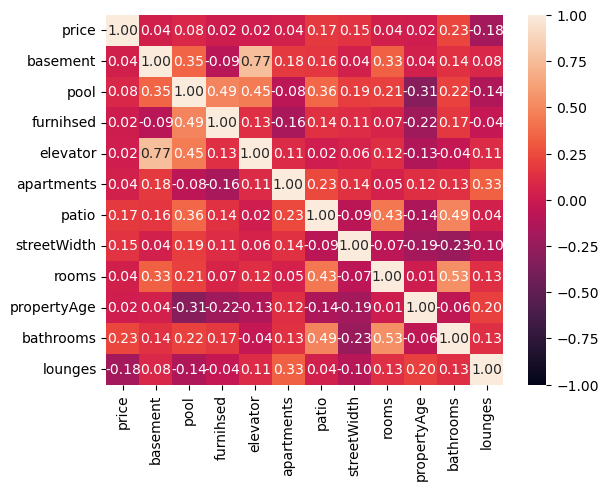

In [57]:
sns.heatmap(Features1.corr(), annot = True, vmin=-1, vmax=1, fmt='0.2f')
plt.show()

### Analyzing Features depends on Prices


In [58]:
AverageB = Features.groupby(['basement'])['price'].mean()
Basement = [0,1]


In [59]:
fig = px.bar(Features, Basement , AverageB)
fig.update_layout(title='Basement')
fig.update_layout(xaxis_title='Basement', yaxis_title='Price') 

In [60]:
fig = px.pie(Features2FF, values=Features2FF['price'], names=Features2FF['front'], title='Front Analysis')
fig.show()


In [61]:
xxxxx = Features.groupby(['propertyAge'])['price'].mean()
yyyyy = sorted(Features['propertyAge'].unique().tolist())
fig = px.histogram( x=yyyyy , y=xxxxx)
fig.update_layout(title='Property Age Analysis')
fig.update_layout(xaxis_title='PropertyAge', yaxis_title='Price')

In [62]:
xxxxx = Features.groupby(['streetWidth'])['price'].mean()
yyyyy=xxxxx.tolist()
unique_names = []
for name in Features['streetWidth']:
    if name not in unique_names:
        unique_names.append(name)

for name in unique_names:
    print(name)
fig = px.bar(Features, x=unique_names, y=yyyyy)
fig.update_layout(title='Relation between Street Width and Price')
fig.update_layout(xaxis_title='Street Width', yaxis_title='Price')
fig


12.0
5.0
15.0
16.0
10.0
13.0
20.0
17.0
30.0


In [63]:
AverageP = Features.groupby(['patio'])['price'].mean()
Patio = [0,1]
fig = px.bar(Features, Patio , AverageP)
fig.update_layout(title='Patio')
fig.update_layout(xaxis_title='Patio', yaxis_title='Price') 

In [64]:
#pip install dash-bootstrap-components

In [65]:
#pip install "dash-bootstrap-components<1"

In [66]:
name_e40, count_east = get_top_names(east_names, 40)
name_w40, count_west = get_top_names(west_names, 40)
name_s40, count_south = get_top_names(south_names, 40)
name_n40, count_north = get_top_names(north_names, 40)
name_c10, count_center = get_top_names(center_names, 10)
valuees

[220, 11251, 12843, 8960, 13548]

In [67]:
maxSPrice = round(DF['square price'].max())
numberOfVillas = DF.shape[0]
averagePrice = round(DF['square price'].mean())

In [72]:
import dash
import dash_bootstrap_components as dbc
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output, State

import plotly.express as px

# the style arguments for the sidebar.
SIDEBAR_STYLE = {
    'position': 'fixed',
    'top': 0,
    'left': 0,
    'bottom': 0,
    'width': '20%',
    'padding': '20px 10px',
    'background-color': '#f8f9fa'
}

# the style arguments for the main content page.
CONTENT_STYLE = {
    'margin-left': '25%',
    'margin-right': '5%',
    'padding': '20px 10px'
}

TEXT_STYLE = {
    'textAlign': 'center',
    'color': '#191970'
}

CARD_TEXT_STYLE = {
    'textAlign': 'center',
    'color': '#0074D9'
}

controls = dbc.FormGroup(
    [
        html.P('Distribution selection', style={
            'textAlign': 'center'
        }),
        dcc.Dropdown(
            id='dropdown',
            options=['count','count %','Avg area','Avg price'],
            value='count',  # default value
            multi=False
        ),
        html.Br(),
        html.P('Locations', style={
            'textAlign': 'center'
        }),
        dcc.Dropdown(
            id='dropdown1',
            options=['south','north','east','west','center'],
            value='south',  # default value
            multi=False
        ),
         html.Br(), 
        html.P('Features Selection of locations', style={
            'textAlign': 'center'
        }),
        dbc.Card([dbc.RadioItems(
            id='radio_items1',
            options=[{
                'label': 'count',
                'value': 1
            },
                {
                    'label': 'AVG',
                    'value': 2
                }
               
            ],
            value=1,
            style={
                'margin': 'auto'
            }
        )]),
        html.Br(),
        
        html.P('Features Selection of Al Nakheel neighbourhood', style={
            'textAlign': 'center'
        }),
        dbc.Card([dbc.RadioItems(
            id='check_list',
            options=[{
                'label': 'Pool',
                'value': 1
                },
                {
                    'label': 'Basment',
                    'value': 2
                },
                {
                    'label': 'Front',
                    'value': 3
                },
                {
                    'label': 'Elevator',
                    'value': 4
                }
            ],
            value=1,
            inline=True
        )]),
        html.Br(),
        html.P('Features Selection of Al Nakheel neighbourhood', style={
            'textAlign': 'center'
        }),
        dbc.Card([dbc.RadioItems(
            id='radio_items',
            options=[{
                'label': 'Rooms',
                'value': 1
            },
                {
                    'label': 'Age',
                    'value': 2
                }
               
            ],
            value=1,
            style={
                'margin': 'auto'
            }
        )]),
        html.Br(),
        
        html.P('Features Selection of Almaseef Neighbourhood', style={
            'textAlign': 'center'
        }),
        dbc.Card([dbc.RadioItems(
            id='radio_items2',
            options=[{
                'label': 'Basement',
                'value': 1
                },
                {
                    'label': 'Patio',
                    'value': 2
                },
                {
                    'label': 'Street Width',
                    'value': 3
                },
                {
                    'label': 'Front',
                    'value': 4
                },
                {
                    'label': 'Property Age',
                    'value': 5
                },
            ],
            value=1,
            inline=False
        )]),
        html.Br(),
        dbc.Button(
            id='submit_button',
            n_clicks=0,
            children='Submit',
            color='primary',
            block=True
        ),
    ]
)

sidebar = html.Div(
    [
        html.H2('Parameters', style=TEXT_STYLE),
        html.Hr(),
        controls
    ],
    style=SIDEBAR_STYLE,
)

content_first_row = dbc.Row([
    dbc.Col(
        dbc.Card(
            [

                dbc.CardBody(
                    [
                        html.H4(id='card_title_1', children=['Card Title 1'], className='card-title',
                                style=CARD_TEXT_STYLE),
                        html.P(id='card_text_1', children=['Sample text.'], style=CARD_TEXT_STYLE),
                    ]
                )
            ]
        ),
        md=3
    ),
    dbc.Col(
        dbc.Card(
            [

                dbc.CardBody(
                    [
                        html.H4(maxSPrice, className='card-title', style=CARD_TEXT_STYLE),
                        html.P('Max Square Price' , style=CARD_TEXT_STYLE),
                    ]
                ),
            ]

        ),
        md=3
    ),
    dbc.Col(
        dbc.Card(
            [
                dbc.CardBody(
                    [
                        html.H4(1475, className='card-title', style=CARD_TEXT_STYLE),
                        html.P('Min Square Price' , style=CARD_TEXT_STYLE),
                    ]
                ),
            ]

        ),
        md=3
    ),
    dbc.Col(
        dbc.Card(
            [
                dbc.CardBody(
                    [
                        html.H4(averagePrice, className='card-title', style=CARD_TEXT_STYLE),
                        html.P('Average Square Price' , style=CARD_TEXT_STYLE),
                    ]
                ),
            ]
        ),
        md=3
    )
])



content_second_row = dbc.Row(
    [
        dbc.Col(
            dcc.Graph(id='graph_1'), md=12
        ),
        dbc.Col(
            dcc.Graph(id='graph_2'), md=12
        )

    ]
)

content_Nakheel_row = dbc.Row(
    [
        html.H2('Exploring Alnakheel', style=TEXT_STYLE),
    ]
)

content_corr_row = dbc.Row(
    [
        dbc.Col(
            dcc.Graph(id='graph_3'), md=12,
        )
    ]
)
 


content_third_row = dbc.Row(
    [
        dbc.Col(
            dcc.Graph(id='graph_4'), md=12,
        )
    ]
)

content_fourth_row = dbc.Row(
    [
        dbc.Col(
            dcc.Graph(id='graph_5'), md=12
        )
    
    ]
)
AlmaseefRow = dbc.Row(
    [
        html.H2('Exploring Almaseef', style=TEXT_STYLE),
        dbc.Col(
            dcc.Graph(id='graph_6'), md=12
        )
    
    ]
)





content = html.Div(
    [
        html.H2('Riyadh Villas Dashboard', style=TEXT_STYLE),
        html.Hr(),
        content_first_row,
        content_second_row,
        content_Nakheel_row,
        content_corr_row,
        content_third_row,
        content_fourth_row,
        AlmaseefRow
    ],
    style=CONTENT_STYLE
)

app = dash.Dash(external_stylesheets=[dbc.themes.BOOTSTRAP])
app.layout = html.Div([sidebar, content])


@app.callback(
    Output('graph_1', 'figure'),
    [Input('submit_button', 'n_clicks')],
    [State('dropdown', 'value'), State('check_list', 'value'),
     State('radio_items', 'value')
     ])
def update_graph_1(n_clicks, dropdown_value, check_list_value, radio_items_value):
    print(n_clicks)
    print(dropdown_value)
    print(check_list_value)
    print(radio_items_value)
    if dropdown_value == 'count':
        fig=px.bar(y=valuees,x=names_loc ,color=names_loc)
        fig.update_layout(title='عدد المنازل')
    elif dropdown_value == 'count %':
        fig = px.pie(values=[Villa_center,Villa_north,Villa_east,Villa_south,Villa_west],
                 names=names)
        fig.update_layout(title='نسبة عدد المنازل')
    elif dropdown_value == 'Avg area':
        fig =px.bar(y=dfspace,x=locations,color=locations)
        fig.update_layout(title=' متوسط المساحة ')
    elif dropdown_value == 'Avg price':
        fig =px.bar(y=dfsprice,x=locations,color=locations)
        fig.update_layout(title=' متوسط الأسعار ')
    return fig

    


@app.callback(
    Output('graph_2', 'figure'),
    [Input('submit_button', 'n_clicks')],
    [State('dropdown1', 'value'), State('radio_items1', 'value')])

def update_graph_2(n_clicks, dropdown_value, radio):
    print(n_clicks)
    print(dropdown_value)
    print('radio value is = ',radio,type(radio))
    if dropdown_value == 'south' and radio ==1:
        print('majed is here')
        fig = px.bar(y=count_south,x=name_s40,color=name_s40)
        fig.update_layout(title=' جنوب الرياض ',
                  xaxis_title='الاحياء', yaxis_title='عدد المنازل')
    elif dropdown_value == 'north' and radio ==1:
        fig = px.bar(y=count_north,x=name_n40,color=name_n40)
        fig.update_layout(title=' شمال الرياض ',
                  xaxis_title='الاحياء', yaxis_title='عدد المنازل')
    elif dropdown_value == 'west' and radio ==1:
        fig = px.bar(y=count_west,x=name_w40,color=name_w40)
        fig.update_layout(title=' غرب الرياض ',
                  xaxis_title='الاحياء', yaxis_title='عدد المنازل')
    elif dropdown_value == 'east' and radio ==1:
        fig = px.bar(y=count_east,x=name_e40,color=name_e40)
        fig.update_layout(title=' شرق الرياض ',
                  xaxis_title='الاحياء', yaxis_title='عدد المنازل')
    elif dropdown_value == 'center' and radio ==1:
        fig = px.bar(y=count_center,x=name_c10,color=name_c10)
        fig.update_layout(title=' وسط الرياض ',
                  xaxis_title='الاحياء', yaxis_title='عدد المنازل')
    elif dropdown_value == 'south' and radio ==2:
        fig = px.bar(y=AVG_south,x=name_s40,color=name_s40)
        fig.update_layout(title=' جنوب الرياض ',
                  xaxis_title='الاحياء', yaxis_title='متوسط الاسعار')
    
    elif dropdown_value == 'north' and radio ==2:
        fig = px.bar(y=AVG_north,x=name_n40,color=name_n40)
        fig.update_layout(title=' شمال الرياض ',
                  xaxis_title='الاحياء', yaxis_title='متوسط الاسعار')
    elif dropdown_value == 'west' and radio ==2:
        fig = px.bar(y=AVG_west,x=name_w40,color=name_w40)
        fig.update_layout(title=' غرب الرياض ',
                  xaxis_title='الاحياء', yaxis_title='متوسط الاسعار')
    elif dropdown_value == 'east' and radio ==2:
        fig = px.bar(y=AVG_east,x=name_e40,color=name_e40)
        fig.update_layout(title=' شرق الرياض ',
                  xaxis_title='الاحياء', yaxis_title='متوسط الاسعار')
    elif dropdown_value == 'center' and radio ==2:
        fig = px.bar(y=AVG_center,x=name_c10,color=name_c10)
        fig.update_layout(title=' وسط الرياض ',
                  xaxis_title='الاحياء', yaxis_title='متوسط الاسعار')
    return fig
        
        
    


@app.callback(
    Output('graph_3', 'figure'),
    [Input('submit_button', 'n_clicks')],
    [State('dropdown', 'value'), State('check_list', 'value'),
     State('radio_items', 'value')
     ])
def update_graph_3(n_clicks, dropdown_value, check_list_value, radio_items_value):
    print(n_clicks)
    print(dropdown_value)
    print(check_list_value)
    print(radio_items_value)
    fig = px.imshow(corr, text_auto=True ,color_continuous_scale = 'Blues')
    fig.layout.height = 700
    fig.layout.width = 800
    return fig
    

@app.callback(
    Output('graph_4', 'figure'),
    [Input('submit_button', 'n_clicks')],
     [State('dropdown', 'value'),  State('check_list', 'value')
     ])
def update_graph_4(n_clicks, dropdown_value, check_list_value):
    print(n_clicks)
    print(dropdown_value)

    print(check_list_value)

    # Sample data and figure
    if check_list_value == 1:
        fig = px.bar(dfN, x=binaryList, y=averageNPool)
        fig.update_layout(title='Pool')
        fig.update_layout(xaxis_title='Pool', yaxis_title='Price') 

    elif check_list_value== 2:
        fig = px.bar(dfN, x=binaryList, y=averageNBasement)
        fig.update_layout(title='Basement')
        fig.update_layout(xaxis_title='Basement', yaxis_title='Price') 

    elif check_list_value== 3:
        fig = px.bar(dfN, x=fromt, y=averageNFront)
        fig.update_layout(title='Front')
        fig.update_layout(xaxis_title='Front', yaxis_title='Price')

    elif check_list_value == 4:
        fig = px.bar(dfN, x=binaryList, y=averageNElvator)
        fig.update_layout(title='Elevator')
        fig.update_layout(xaxis_title='Elevator', yaxis_title='Price')
    return fig

        


@app.callback(
    Output('graph_5', 'figure'),
    [Input('submit_button', 'n_clicks')],
    [State('dropdown', 'value'), State('check_list', 'value'),
     State('radio_items', 'value')
     ])
def update_graph_5(n_clicks, dropdown_value, check_list_value, radio_items_value):
    print(n_clicks)
    print(dropdown_value)
    print(check_list_value)
    print(radio_items_value)  # Sample data and figure
    if radio_items_value == 1:
        fig =  px.line(dfN, x=rooms, y= averageNRooms, title='Number of rooms')
        fig.update_layout(xaxis_title='Rooms', yaxis_title='Price') 
        return fig
    elif radio_items_value == 2:
        fig =  px.line(dfN, x=propertyAge, y= averageNAge, title='Property Age')
        fig.update_layout(xaxis_title='Property Age', yaxis_title='Price')
        return fig
    
@app.callback(
    Output('graph_6', 'figure'),
    [Input('submit_button', 'n_clicks')],
    [State('dropdown', 'value'), State('check_list', 'value'),
     State('radio_items2', 'value')
     ])
def update_graph_6(n_clicks, dropdown_value, check_list_value, radio_items_value):
    print(n_clicks)
    print(dropdown_value)
    print(check_list_value)
    print(radio_items_value)  # Sample data and figure
    if radio_items_value == 1:
        fig = px.bar(Features, Basement , AverageB)
        fig.update_layout(title='Relation between Basement and Price')
        fig.update_layout(xaxis_title='Basement', yaxis_title='Price') 
    elif radio_items_value == 2:
        fig = px.bar(Features, Patio , AverageP)
        fig.update_layout(title='Relation between Patio and Price')
        fig.update_layout(xaxis_title='Patio', yaxis_title='Price') 
    elif radio_items_value == 3 :
        fig = px.bar(Features, x=unique_names, y=yyyyy)
        fig.update_layout(title='Relation between Street Width and Price')
        fig.update_layout(xaxis_title='Street Width', yaxis_title='Price')
    elif  radio_items_value == 4 :
        fig = px.pie(Features2FF, values=Features2FF['price'], names=Features2FF['front'], title='Front Analysis')    
    elif radio_items_value == 5 :
        fig = px.histogram( x=yyyyy , y=xxxxx)
        fig.update_layout(title='Property Age Analysis')
        fig.update_layout(xaxis_title='PropertyAge', yaxis_title='Price')
        
    return fig







@app.callback(
    Output('card_title_1', 'children'),
    [Input('submit_button', 'n_clicks')],
    [State('dropdown', 'value'), State('check_list', 'value'),
     State('radio_items', 'value')
     ])
def update_card_title_1(n_clicks, dropdown_value, check_list_value, radio_items_value):
    print(n_clicks)
    print(dropdown_value)
    print(check_list_value)
    print(radio_items_value)  # Sample data and figure
    return numberOfVillas


@app.callback(
    Output('card_text_1', 'children'),
    [Input('submit_button', 'n_clicks')],
    [State('dropdown', 'value'), State('check_list', 'value'),
     State('radio_items', 'value')
     ])
def update_card_text_1(n_clicks, dropdown_value, check_list_value, radio_items_value):
    print(n_clicks)
    print(dropdown_value)

    print(check_list_value)
    print(radio_items_value)  # Sample data and figure
    return 'Number of Villas'





if __name__ == '__main__':
    app.run_server( use_reloader=False ,port='8077')

Dash is running on http://127.0.0.1:8077/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8077/ (Press CTRL+C to quit)
127.0.0.1 - - [03/Jun/2023 22:11:59] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [03/Jun/2023 22:11:59] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [03/Jun/2023 22:11:59] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [03/Jun/2023 22:11:59] "GET /_dash-component-suites/dash/dcc/async-dropdown.js HTTP/1.1" 304 -
127.0.0.1 - - [03/Jun/2023 22:11:59] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 304 -
127.0.0.1 - - [03/Jun/2023 22:11:59] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [03/Jun/2023 22:11:59] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [03/Jun/2023 22:11:59] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 304 -
127.0.0.1 - - [03/Jun/2023 22:11:59] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [03/Jun/2023 22:11:59] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [03/Jun/2023 22:11:59] "POST /_dash-update-component HTTP/1.

00
count
1
1

count
1
1
0
count
1
1
0
south
radio value is =  1 <class 'int'>
majed is here
0
count
1
1
0
count
1
0
count
1
1
0
count
1
1


127.0.0.1 - - [03/Jun/2023 22:12:34] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [03/Jun/2023 22:12:34] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [03/Jun/2023 22:12:34] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [03/Jun/2023 22:12:34] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [03/Jun/2023 22:12:34] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [03/Jun/2023 22:12:34] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [03/Jun/2023 22:12:34] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [03/Jun/2023 22:12:34] "POST /_dash-update-component HTTP/1.1" 200 -


11
south
radio value is =  1 <class 'int'>
majed is here
1
count %
4
1

count %
4
1
1
count %
4
1
count %
4
1
1
count %
4
1
1
count %
4
1
1
count %
4
1


127.0.0.1 - - [03/Jun/2023 22:12:40] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [03/Jun/2023 22:12:40] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [03/Jun/2023 22:12:40] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [03/Jun/2023 22:12:40] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [03/Jun/2023 22:12:40] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [03/Jun/2023 22:12:40] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [03/Jun/2023 22:12:40] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [03/Jun/2023 22:12:40] "POST /_dash-update-component HTTP/1.1" 200 -


22
south
radio value is =  1 <class 'int'>
majed is here

Avg area
4
1
2
Avg area
4
1
2
Avg area
4
2
Avg area
4
1
2
Avg area
4
1
2
Avg area
4
1
2
Avg area
4
1
